In [1]:
import pickle
from matplotlib import pyplot as plt
import torch
import json
%matplotlib

Using matplotlib backend: TkAgg


In [5]:
ids = ['config0', 'config1', 'config2', 'config3', 'config4', 'config5', 'config6', 'config7', 'config8']
ids = ['config'+str(x) for x in range(13)]
stats = {}

#stats = pickle.load(open('../../stats_2', 'rb'))
#stats = pickle.load(open('loc_stats', 'rb'))
for id in ids:
    with open('../../configs/'+id+'.json', 'r') as config_file:
        config = json.load(config_file)
        stats[id] = config['stats']

In [6]:
resolution = 100
to_plot = 'acc'
for id in ids:
    data = stats[id][to_plot]
    means = torch.tensor(data[:(len(data)//resolution)*resolution]).view(-1, resolution).mean(dim=1)
    plt.plot(range(len(means)), means, label=id)
plt.legend()

In [8]:
ids2 = ['config2', 'config3', 'config4', 'config5', 'config6', 'config7', 'config8']
ids2 = ['config'+str(x) for x in range(2, 13)]

to_plot = 'val'
for id in ids2:
    data = stats[id][to_plot]
    plt.plot(range(len(data)), data, label=id)
plt.legend()

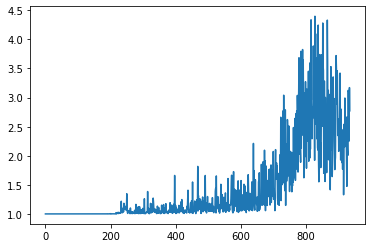

In [21]:
plt.plot(range(len(stats['grad_norm'])), stats['grad_norm'])

In [ ]:
torch.tensor(stats['grad_norm']).mean()

In [ ]:
torch.tensor(stats['grad_norm']).var().sqrt()

In [7]:
(torch.tensor(stats['grad_norm']) > 0.15).float().mean()

tensor(0.0888)

In [9]:
torch.tensor(stats['grad_norm']).var().sqrt()

tensor(0.0357)

In [12]:
(torch.tensor(stats['grad_norm']) > 0.15).float().mean()

tensor(0.0625)

In [15]:
torch.tensor(stats['grad_norm']).view(36, 1001).mean(dim=1)

tensor([0.1405, 0.1461, 0.1507, 0.1256, 0.1128, 0.1055, 0.0981, 0.0980, 0.0893,
        0.0898, 0.0906, 0.0917, 0.0862, 0.0869, 0.0902, 0.0855, 0.0865, 0.0818,
        0.0808, 0.0849, 0.0787, 0.0757, 0.0788, 0.0754, 0.0790, 0.0746, 0.0763,
        0.0733, 0.0725, 0.0736, 0.0712, 0.0719, 0.0693, 0.0686, 0.0710, 0.0675])